In [1]:
import gc
gc.collect()

5

In [173]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [174]:
df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/customer_merged.pkl')

In [4]:
df.shape

(9929291, 29)

In [5]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,...,Deborah,Glass,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,...,Heather,Myers,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,...,Heather,Myers,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,both


In [6]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'busiest_day', 'busiest_days',
       'busy_time', 'max_order', 'loyalty_flag', 'First Name', 'Surnam',
       'Gender', 'STATE', 'Age', 'date_joined', 'Number_of_dependents',
       'family_status', 'income', '_merge'],
      dtype='object')

In [7]:
#Customer's first & last name are PII & were removed earlier because of potential privacy issue (especially with household income being included in the data)

In [9]:
#View all States in 'State' column

df['STATE'].value_counts(dropna= False)

Pennsylvania            213726
Rhode Island            205629
Georgia                 204552
South Carolina          204056
California              203579
Missouri                203383
Alabama                 203318
New York                202432
Kansas                  201727
Louisiana               201299
Massachusetts           200385
Arkansas                199933
South Dakota            199323
Virginia                199307
Arizona                 198481
Wyoming                 198236
Oregon                  197898
Oklahoma                197811
Minnesota               197545
Colorado                197366
North Carolina          196447
Florida                 195361
Washington              195093
Michigan                195024
Tennessee               194899
Illinois                194795
New Jersey              194656
Alaska                  194089
District of Columbia    193295
Mississippi             193181
Kentucky                192429
Vermont                 192371
New Mexi

In [11]:
#Create “Region” column based on “State” column using For-loop

result = []

for value in df ["STATE"]:
    if (value == "Maine" or value=="New Hampshire" or value=="Vermont" or value=="Massachusetts" or value=="Rhode Island" or value=="Connecticut" or value=="New York" or value=="Pennsylvania" or value=="New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin" or value=="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        result.append("Midwest")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        result.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        result.append("West")
    else:
        result.append("Not Enough Data")

In [12]:
#Viewing result
result

['Midwest',
 'Midwest',
 'Northeast',
 'Midwest',
 'Midwest',
 'West',
 'South',
 'South',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'West',
 'South',
 'South',
 'Northeast',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'South',
 'South',
 'Midwest',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'South',
 'West',
 'Midwest',
 'South',
 'South',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'Midwest',
 'West',
 'Northeast',
 'South',
 'South',
 'South',
 'South',

In [13]:
#Create 'Country_Region' column in df using result

df['Country_Region'] = result

In [14]:
#Print frequency of this new column

df['Country_Region'].value_counts(dropna=False)

South              3328209
West               2513351
Midwest            2314228
Northeast          1771613
Not Enough Data       1890
Name: Country_Region, dtype: int64

In [17]:
#Difference in spending habits b/w regions? - Crossing Region variable w/ Spending Flag

crosstab = pd.crosstab(df['Country_Region'], df['income'], dropna = False)

In [18]:
#Copy crosstab to clipboard to then past in Excel

crosstab.to_clipboard()

In [19]:
#View crosstab
crosstab

income,25986.0,26024.0,26061.0,26070.0,26116.0,26119.0,26137.0,26141.0,26170.0,26234.0,...,551849.0,552776.0,553569.0,556641.0,569253.0,569810.0,573849.0,576876.0,577728.0,593901.0
Country_Region,,,,,,,,,,,,,,,,,,,,,
Midwest,8,0,0,0,36,0,0,0,0,741,...,0,544,138,0,752,0,0,0,0,0
Northeast,0,0,0,0,0,0,0,0,29,0,...,0,0,0,0,0,0,0,593,0,0
South,0,0,86,0,0,0,56,61,0,0,...,247,0,0,574,0,395,388,0,77,0
West,0,19,0,45,470,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,640


In [20]:
#Regional statistics - Regional Prices

df.groupby(['Country_Region']).agg({'prices':['median']})

,prices
,median
Country_Region,
Midwest,7.4
Northeast,7.4
Not Enough Data,7.1
South,7.4
West,7.4


In [21]:
df.groupby(['Country_Region']).agg({'prices':['sum']})

,prices
,sum
Country_Region,
Midwest,2.559635e+07
Northeast,1.922904e+07
Not Enough Data,1.438300e+04
South,3.839818e+07
West,2.758585e+07


In [22]:
df.groupby(['Country_Region']).agg({'order_number':['sum']})

,order_number
,sum
Country_Region,
Midwest,39303969.0
Northeast,30900071.0
Not Enough Data,0.0
South,57200649.0
West,42673634.0


In [23]:
df.groupby(['Country_Region']).agg({'order_hour_of_day':['median']})

,order_hour_of_day
,median
Country_Region,
Midwest,13.0
Northeast,13.0
Not Enough Data,NaN
South,13.0
West,13.0


In [24]:
df.groupby(['Country_Region']).agg({'days_since_prior_order':['median']})

,days_since_prior_order
,median
Country_Region,
Midwest,8.0
Northeast,8.0
Not Enough Data,NaN
South,8.0
West,8.0


In [25]:
#IN SUMMARY: The regions appear to have similar spending habits in regards to 'days_since_prior_order', 'order_hour_of_day' & 'prices'. The South places the greatest number of orders & in turn that is reflected in the highest sum of the prices paid.

In [26]:
#Checking df shape before sample created
df.shape

(9929291, 30)

In [27]:
#Create 'If' statements using loc() function

df.loc[df['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [28]:
df.loc[df['order_number'] >= 5,'Activity_Flag'] = 'High_Activity'

In [29]:
#Print frequency of new 'Activity_Flag' column

df ['Activity_Flag'].value_counts(dropna=False)

High_Activity    7479807
Low_Activity     2447594
NaN                 1890
Name: Activity_Flag, dtype: int64

In [30]:
#Create sample df of solely low_activty customers

df_low_activity = df[df.Activity_Flag == 'Low_Activity']

In [31]:
#Check sample df
df_low_activity.shape

(2447594, 31)

In [32]:
df_low_activity ['Activity_Flag'].value_counts(dropna= False)

Low_Activity    2447594
Name: Activity_Flag, dtype: int64

In [34]:
#Export df_low_activity df

df_low_activity.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/df_low_activity_task_4_10_part1.pkl')

In [35]:
#Update current df to exclude 'Low_Activity' customers

df = df[df.Activity_Flag == 'High_Activity']

In [36]:
#Check main df
df.shape

(7479807, 31)

In [37]:
df['Activity_Flag'].value_counts(dropna= False)

High_Activity    7479807
Name: Activity_Flag, dtype: int64

In [39]:
#Export df for saving progress purposes

df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/high_activity_only_task_4_10.pkl')

In [40]:
#06. Create 'Parent Status' Column

In [41]:
df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/high_activity_only_task_4_10.pkl')

In [42]:
#Creat parent status column
df ['Parent_Status']=""

In [47]:
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['Number_of_dependents'] >= 1)), 'Parent_Status'] = 'Young Parent'

In [48]:
df.loc[(df ['Number_of_dependents'] == 0), 'Parent_Status'] = 'No Dependants'

In [50]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 60) & (df['Number_of_dependents'] >= 1), 'Parent_Status'] = 'Middle Age Parent'

In [51]:
df.loc[(df['Age'] >= 60) & (df['Number_of_dependents'] >= 1), 'Parent_Status'] = 'Older Age Parent'

In [52]:
#View column counts
df['Parent_Status'].value_counts(dropna= False)

Middle Age Parent    2189019
Older Age Parent     1915068
No Dependants        1846195
Young Parent         1529525
Name: Parent_Status, dtype: int64

In [53]:
#Create 'Income' column

df ['Income Level']=""

In [54]:
df.loc[(df['income'] < 40100), 'Income Level'] = 'Lower Income'

In [55]:
df.loc[(df['income'] >= 40100) & (df['income'] <= 120400), 'Income Level'] = 'Middle Income'

In [56]:
df.loc[(df['income'] > 120400), 'Income Level'] = 'Higher Income'

In [57]:
df['Income Level'].value_counts(dropna= False)

Middle Income    4898051
Higher Income    2178158
Lower Income      403598
Name: Income Level, dtype: int64

In [58]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,Age,date_joined,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,81.0,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,81.0,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,51.0,1/4/2019,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,65.0,7/25/2019,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,72.0,3/30/2018,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income


In [59]:
df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/parent_income_profiles.pkl')

In [60]:
#08. Create 'Pet Order Flag' Column then 'Pet Owner' Column
#Create Pet Order Flag Column

In [61]:
#Import parent_income_profiles df

df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/parent_income_profiles.pkl')

In [62]:
#Create pet order flag column

df ['Pet Order Flag']=""

In [63]:
df.loc[(df['department_id'] == 8), 'Pet Order Flag'] = 1

In [64]:
df.loc[(df['department_id'] != 8), 'Pet Order Flag'] = 0

In [65]:
df['Pet Order Flag'].value_counts(dropna= False)

0    7458025
1      21782
Name: Pet Order Flag, dtype: int64

In [66]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,date_joined,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,1/4/2019,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,0
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,7/25/2019,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,0
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,3/30/2018,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,0


In [67]:
df.shape

(7479807, 34)

In [70]:
df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/pet_order_flag.pkl')

In [71]:
#Create Pet Owner Column

In [74]:
df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/pet_order_flag.pkl')

In [75]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,date_joined,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,1/4/2019,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,0
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,7/25/2019,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,0
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,3/30/2018,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,0


In [76]:
df.shape

(7479807, 34)

In [77]:
# Group by user_id, sum by total num of orders in dept 8 per user_id (Pet Order Flag)

df_grouped = df.groupby('user_id').agg({'Pet Order Flag':'sum'})

In [78]:
# Create Pet Owner column 

df_grouped['Pet Owner'] =""

In [79]:
# If Pet Order >= 1 then "Pet Owner" (user had 1 or more orders in dept 8

df_grouped.loc[(df_grouped['Pet Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [80]:
# If user has no orders in dept 8

df_grouped.loc[(df_grouped['Pet Order Flag'] == 0), 'Pet Owner'] = "Not Pet Owner"

In [81]:
# Drop Pet Order Flag column

df_grouped = df_grouped.drop(columns = ['Pet Order Flag'])

In [82]:
df_grouped.shape

(49735, 1)

In [85]:
#Export grouped Pet Order Flag df

df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/grouped_pet_order_flag.pkl')

In [86]:
#Merge original df with Pet Owner df

In [87]:
df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/grouped_pet_order_flag.pkl')

In [89]:
#Import grouped pet order flag

df = pd.read_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/grouped_pet_order_flag.pkl')

In [90]:
# Left join df (left) with df_grouped (right) to get "Pet Order" for each user_id

df = df.merge(df_grouped, on='user_id', how='left')

In [91]:
df['Pet Owner'].value_counts(dropna= False)

Not Pet Owner    6657489
Pet Owner         822318
Name: Pet Owner, dtype: int64

In [92]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag,Pet Owner
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0,Not Pet Owner
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,0,Not Pet Owner
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,0,Not Pet Owner
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,0,Not Pet Owner
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,0,Not Pet Owner


In [93]:
df = df.drop(columns =['Pet Order Flag'])

In [94]:
df.shape

(7479807, 34)

In [95]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,date_joined,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,8/1/2019,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,1/4/2019,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,Not Pet Owner
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,7/25/2019,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,Not Pet Owner
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,3/30/2018,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,Not Pet Owner


In [96]:
df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/pet_owner_column_created.pkl')

In [97]:
#09. Create 'Baby Order Flag' Column then 'Baby Household' Column
#Create Baby Order Flag Column

In [98]:
#Create baby order column

df['Baby Order Flag']=""

In [99]:
df.loc[(df['department_id'] == 18), 'Baby Order Flag'] = 1

In [100]:
df.loc[(df['department_id'] != 18), 'Baby Order Flag'] = 0

In [101]:
#Print value counts for new column

df['Baby Order Flag'].value_counts(dropna= False)

0    7377342
1     102465
Name: Baby Order Flag, dtype: int64

In [102]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,0
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,Not Pet Owner,0
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,Not Pet Owner,0
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,Not Pet Owner,0


In [104]:
#Create Baby Household Column

In [105]:
# Group by user_id, sum by total num of orders in dept 18 per user_id (Baby Order Flag)

df_baby_grouped = df.groupby('user_id').agg({'Baby Order Flag':'sum'})

In [106]:
# Create Baby Household column 

df_baby_grouped['Baby Household'] =""

In [107]:
# If Baby Order >= 1 then "Baby Household" (user had 1 or more orders in dept 18)

df_baby_grouped.loc[(df_baby_grouped['Baby Order Flag'] >= 1), 'Baby Household'] = "Baby Household"

In [108]:
# If Baby Order = 0 then "Baby Household" (user had no orders in dept 18)

df_baby_grouped.loc[(df_baby_grouped['Baby Order Flag'] == 0), 'Baby Household'] = "Non-Baby Household"

In [109]:
df_baby_grouped.shape

(49735, 2)

In [110]:
df_baby_grouped.head()

,Baby Order Flag,Baby Household
user_id,,
1.0,0,Non-Baby Household
2.0,0,Non-Baby Household
3.0,0,Non-Baby Household
4.0,0,Non-Baby Household
7.0,0,Non-Baby Household


In [111]:
# Left join df (left) with df_baby_grouped (right) to get "Baby Household" for each user_id

df = df.merge(df_baby_grouped, on='user_id', how='left')

In [112]:
df['Baby Household'].value_counts(dropna= False)

Non-Baby Household    5107623
Baby Household        2372184
Name: Baby Household, dtype: int64

In [113]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag_x,Baby Order Flag_y,Baby Household
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,44856.0,both,South,High_Activity,No Dependants,Middle Income,Not Pet Owner,0,0,Non-Baby Household
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,Not Pet Owner,0,0,Non-Baby Household


In [114]:
df.shape

(7479807, 37)

In [115]:
#Drop Baby Order Flag columns

df = df.drop(columns = ['Baby Order Flag_x','Baby Order Flag_y'])

In [116]:
#Ensure columns dropped
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_the_week,...,Number_of_dependents,family_status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Household
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,1.0,married,49620.0,both,Midwest,High_Activity,Older Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,...,2.0,married,57797.0,both,West,High_Activity,Middle Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456.0,910.0,prior,12.0,3.0,...,0.0,divorced/widowed,44856.0,both,South,High_Activity,No Dependants,Middle Income,Not Pet Owner,Non-Baby Household
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558.0,1052.0,prior,10.0,1.0,...,1.0,married,153843.0,both,West,High_Activity,Older Age Parent,Higher Income,Not Pet Owner,Non-Baby Household


In [117]:
df.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /Data/Prepared Data/baby_household_column_created.pkl')

In [119]:
#10. Customer Profiles & their Comparison to Regions
#Create Customer Profile df



In [120]:
#Create new df with only necessary columns

df_customer_profile = df[['user_id', 'Country_Region', 'department_id', 'Parent_Status', 'Income Level', 'Pet Owner', 'Baby Household']]

In [121]:
#View df_customer_profile

df_customer_profile.head()

,user_id,Country_Region,department_id,Parent_Status,Income Level,Pet Owner,Baby Household
0,138.0,Midwest,19,Older Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,138.0,Midwest,19,Older Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,777.0,West,19,Middle Age Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,910.0,South,19,No Dependants,Middle Income,Not Pet Owner,Non-Baby Household
4,1052.0,West,19,Older Age Parent,Higher Income,Not Pet Owner,Non-Baby Household


In [122]:
df_customer_profile.shape

(7479807, 7)

In [124]:
#Export df with solely customer profile columns
df_customer_profile.to_pickle(r'/Users/mattrauth/Desktop/Instacart Basket Analysis /only_customer_profiles.pkl')

In [126]:
#Group by Country Region

In [127]:
#Count of user_id in each region

df_region = df_customer_profile.groupby('Country_Region').agg({'user_id':['nunique']})

In [128]:
#View grouped result
df_region

,user_id
,nunique
Country_Region,
Midwest,11730
Northeast,8692
South,16629
West,12684


In [129]:
#Group by Parent Status

In [130]:
df_parent = df_customer_profile.groupby('Parent_Status').agg({'user_id':['nunique']})

In [131]:
df_parent

,user_id
,nunique
Parent_Status,
Middle Age Parent,14656
No Dependants,12271
Older Age Parent,12890
Young Parent,9918


In [133]:
#Group by Parent Status & Region

In [134]:
#Count of user_id in each Parent category

df_parent_region = df_customer_profile.groupby(['Parent_Status','Country_Region']).agg({'user_id':['nunique']})

In [135]:
df_parent_region

user_id
                                 nunique
Parent_Status     Country_Region        
Middle Age Parent Midwest           3466
                  Northeast         2592
                  South             4844
                  West              3754
No Dependants     Midwest           2837
                  Northeast         2178
                  South             4091
                  West              3165
Older Age Parent  Midwest           3033
                  Northeast         2235
                  South             4353
                  West              3269
Young Parent      Midwest           2394
                  Northeast         1687
                  South             3341
                  West              2496

In [136]:
#Group by Income Level

In [137]:
df_income = df_customer_profile.groupby('Income Level').agg({'user_id':['nunique']})

In [139]:
df_income

,user_id
,nunique
Income Level,
Higher Income,13735
Lower Income,3890
Middle Income,32110


In [140]:
df_income_region = df_customer_profile.groupby(['Income Level','Country_Region']).agg({'user_id':['nunique']})

In [141]:
df_income_region

user_id
                             nunique
Income Level  Country_Region        
Higher Income Midwest           3286
              Northeast         2434
              South             4518
              West              3497
Lower Income  Midwest            945
              Northeast          672
              South             1299
              West               974
Middle Income Midwest           7499
              Northeast         5586
              South            10812
              West              8213

In [142]:
#Group by Pet Owner

In [143]:
df_pet = df_customer_profile.groupby('Pet Owner').agg({'user_id':['nunique']})

In [144]:
df_pet

,user_id
,nunique
Pet Owner,
Not Pet Owner,46390
Pet Owner,3345


In [146]:
#Group by Pet Owner & Region

In [147]:
df_pet_region = df_customer_profile.groupby(['Pet Owner','Country_Region']).agg({'user_id':['nunique']})

In [148]:
df_pet_region

user_id
                             nunique
Pet Owner     Country_Region        
Not Pet Owner Midwest          10938
              Northeast         8117
              South            15550
              West             11785
Pet Owner     Midwest            792
              Northeast          575
              South             1079
              West               899

In [149]:
#Group by Baby Household

In [150]:
df_baby = df_customer_profile.groupby('Baby Household').agg({'user_id':['nunique']})

In [151]:
df_baby

,user_id
,nunique
Baby Household,
Baby Household,7816
Non-Baby Household,41919


In [153]:
#Group by Baby Household & Region

In [154]:
df_baby_region = df_customer_profile.groupby(['Baby Household','Country_Region']).agg({'user_id':['nunique']})

In [155]:
df_baby_region

user_id
                                  nunique
Baby Household     Country_Region        
Baby Household     Midwest           1873
                   Northeast         1345
                   South             2624
                   West              1974
Non-Baby Household Midwest           9857
                   Northeast         7347
                   South            14005
                   West             10710

In [156]:
#11. Visualization - 'Parent Status' Distribution & Regional Distribution

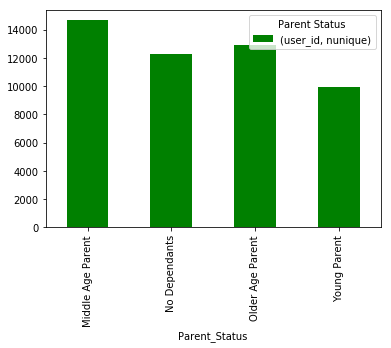

In [157]:
#Create Bar Chart for parent status

df_parent.plot.bar(color=['green'])
plt.legend(title='Parent Status')

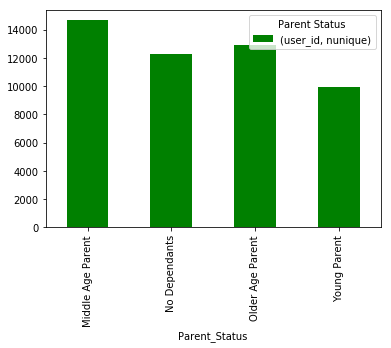

In [158]:
#Saving Bar Chart in jupyter memory

bar_parent_status = df_parent.plot.bar(color=['green'])
plt.legend(title='Parent Status')

In [160]:
#View bar chart
bar_parent_status.figure
plt.savefig('bar_parent_stask_4_10.png')

<Figure size 432x288 with 0 Axes>

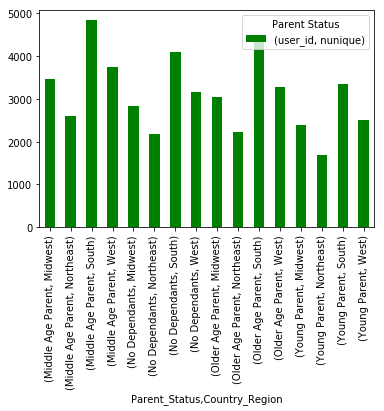

In [162]:
#Create Bar Chart for parent status & region

bar_parent_region = df_parent_region.plot.bar(color=['green'])
plt.legend(title='Parent Status')
plt.savefig('bar_parent_region_task_4_10.png')

In [164]:
#12. Visualization - 'Income Level' Distribution & Regional Distribution

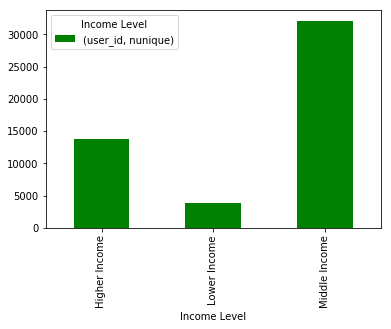

In [166]:
#Create Bar Chart for income status

bar_income = df_income.plot.bar(color=['green'])
plt.legend(title='Income Level')
plt.savefig('bar_income_4_10.png')

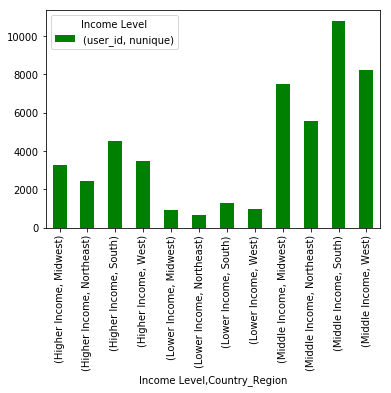

In [169]:
#Create Bar Chart for income status by region

bar_income_region = df_income_region.plot.bar(color=['green'])
plt.legend(title='Income Level')
plt.savefig('bar_income_region_task_4_10.png')

In [171]:
#13. Visualization - 'Pet Owner' Distribution & Regional Distribution


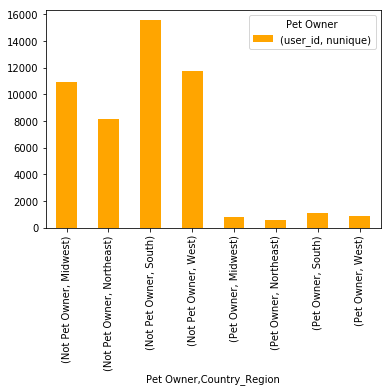

In [175]:
#Create Bar Chart for pet owner status & region

bar_pet_region = df_pet_region.plot.bar(color=['orange'])
plt.legend(title='Pet Owner')
plt.savefig('bar_pet_region.png')

In [176]:
#14. Visualization - 'Baby Household' Distribution & Regional Distribution

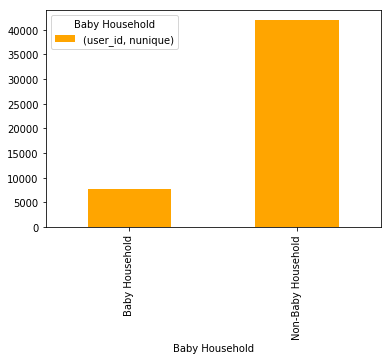

In [178]:
#Create baby household bar chart 

bar_baby = df_baby.plot.bar(color=['orange'])
plt.legend(title='Baby Household')
plt.savefig('bar_baby_household.png')

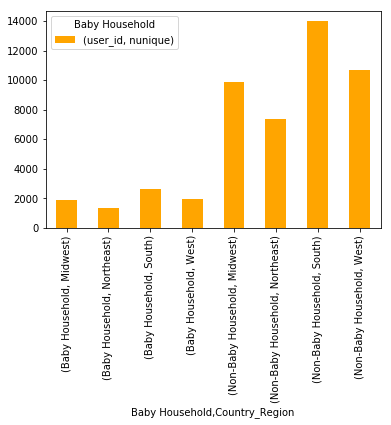

In [180]:
#Create Bar Chart for baby household & region

bar_baby_region = df_baby_region.plot.bar(color=['orange'])
plt.legend(title='Baby Household')
plt.savefig('bar_baby_household_region.png')

In [181]:
#15. Aggregate max, mean, & min variables on Customer Profiles

In [184]:
#Do certain Parent categories shop at different hours of the day?

df.groupby('family_status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                       
                                               max  min       mean median
family_status                                                            
divorced/widowed                              23.0  0.0  13.448622   13.0
living with parents and siblings              23.0  0.0  13.408832   13.0
married                                       23.0  0.0  13.421875   13.0
single                                        23.0  0.0  13.406358   13.0

In [187]:
#Do females or males tend to place orders fewer days apart? 

df.groupby('Gender').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                         mean median  min   max
Gender                                         
Female              11.085576    8.0  0.0  30.0
Male                11.129748    8.0  0.0  30.0

In [190]:
#Do higher spenders shop at different hours of the day?

df.groupby('income').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day                   
                      mean median   min   max
income                                       
25986.0          13.500000   13.0  13.0  15.0
26024.0          14.368421   15.0  10.0  18.0
26061.0          14.267442   14.0  13.0  16.0
26070.0          10.355556    8.0   6.0  22.0
26116.0          14.480237   14.0  10.0  22.0
26119.0          13.633333   13.0  12.0  15.0
26137.0          14.857143   16.0   5.0  21.0
26141.0          13.803279   15.0   5.0  22.0
26170.0          16.241379   18.0  13.0  19.0
26234.0          10.448043   11.0   7.0  16.0
26256.0          10.459677   10.0   9.0  13.0
26304.0          11.551622   10.0   8.0  21.0
26307.0           8.769231    8.0   7.0  11.0
26308.0          11.558140   11.0  10.0  14.0
26320.0          13.500000   14.0   7.0  18.0
26323.0          18.333333   20.0  13.0  20.0
26334.0          12.344828   12.0  10.0  14.0
26348.0          11.585714   12.0   9.0  14.0
26398.0          12.000000   12.0   9.0  15.0
26408.0          13.772727   12.0   9.0  22.0
26409.0          17.000000   18.0  15.0  18.0
26411.0          11.142857    9.0   9.0  14.0
26439.0          16.896907   16.0   9.0  23.0
26453.0          10.695652    8.0   8.0  15.0
26456.0          12.117647   11.0  10.0  14.0
26475.0          13.424242   14.0  11.0  17.0
26529.0          10.615385   11.0  10.0  11.0
26549.0          14.282051   16.0   0.0  22.0
26576.0          14.000000   14.0   7.0  17.0
26587.0          10.744141   11.0   8.0  16.0
...                    ...    ...   ...   ...
484889.0         12.933036   13.5   0.0  20.0
485320.0         12.738197   13.0   7.0  20.0
493670.0         12.229167   11.0   9.0  18.0
494222.0         12.485765   13.0   7.0  17.0
497453.0          8.945652    9.0   6.0  12.0
497926.0         13.677966   12.0   9.0  17.0
500871.0         13.018605   13.0   0.0  21.0
506877.0         11.584337   12.0   7.0  22.0
509944.0         13.931707   14.0   8.0  21.0
510231.0         11.007500   12.0   0.0  22.0
514782.0         14.245098   16.0   7.0  18.0
514838.0         17.425000   20.0  10.0  23.0
515638.0          9.440252    8.0   4.0  18.0
515905.0          9.095238    9.0   9.0  10.0
518122.0         15.887324   15.0  13.0  20.0
518856.0         12.278351   11.0   8.0  21.0
521807.0         14.617339   15.0   9.0  20.0
532201.0         10.558824   11.0  10.0  11.0
540828.0         13.466942   14.0   0.0  23.0
544896.0         12.247379   13.0   6.0  18.0
551849.0         11.676113   12.0   0.0  22.0
552776.0         14.406250   14.0   0.0  22.0
553569.0         10.217391   10.0   8.0  17.0
556641.0         13.160279   12.0   9.0  21.0
569253.0         11.997340   11.0   6.0  20.0
569810.0         12.630380   12.0   2.0  23.0
573849.0         13.512887   13.0   6.0  22.0
576876.0         14.897133   15.0   7.0  21.0
577728.0         15.519481   16.0  12.0  17.0
593901.0         13.203125   12.0   6.0  21.0

[50624 rows x 4 columns]

In [191]:
df.groupby('Gender').agg({'income':['mean','median','min', 'max']})

income                            
                mean   median      min       max
Gender                                          
Female  99274.047972  96214.0  25986.0  573849.0
Male    99075.298441  96437.0  26024.0  593901.0

In [194]:
#16. Link between Customer Profiles & Departments?

In [195]:
#Parent Status by Department

crosstab_parent_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Parent_Status'], dropna=False )
crosstab_parent_department 

Parent_Status,Middle Age Parent,No Dependants,Older Age Parent,Young Parent
department_id,,,,
1,144991,120840,129174,100006
2,2165,2043,2090,1870
3,78951,68519,69840,54577
4,644245,546603,569448,453132
5,9032,8237,7491,7565
6,17957,15207,15102,12524
7,182850,156857,159328,124433
8,6190,5484,5168,4940
9,57278,48440,48763,39135


In [196]:
crosstab_parent_department.to_clipboard()

In [197]:
#Each age category places roughly the same percentage of orders from each department - Middle Aged Parents always make up the largest percentage while Young Parents make up the lowest percentage. No Dependants & Older Age Parents alternate as the 2nd & 3rd largest percentage.

#Produce & Dairy/eggs are by far the most popular departments for each age group.

#Surprisingly, all categories (including No Dependants) purchase items from the Baby department. Perhaps as gifts?

In [198]:
#Income Level by Department

crosstab_income_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Income Level'], dropna=False )
crosstab_income_department 

Income Level,Higher Income,Lower Income,Middle Income
department_id,,,
1,146782,24242,323987
2,2296,428,5444
3,82443,13125,176319
4,651667,95757,1466004
5,10770,2013,19542
6,18362,2357,40071
7,173730,47682,402056
8,6306,1149,14327
9,58662,7072,127882


In [199]:
crosstab_income_department.to_clipboard()

In [200]:
#Each income level places roughly the same percentage of orders from each department - Higher Income always make up the largest percentage followed by Middle Income then Lower Income.

#Percentages to take note of are:

#*Middle income groups purchase the least from Departments 5 (alcohol) & 8 (pet)

#*Lower income consistently make up 4-6% of most departments but this increases greatly in Department 19 (snacks) where they make up 11%

#*The percentage of Higher income orders on the otherhand drop to 26% for snacks (the lowest percentage) for higher income
#
#*Higher income customers largest percentage spent is in deparments 8 (pets) & 12(meat/seafood)

In [201]:
#Pet Owner by Department

crosstab_pet_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Pet Owner'], dropna=False )
crosstab_pet_department 

Pet Owner,Not Pet Owner,Pet Owner
department_id,,
1,430804,64207
2,6810,1358
3,238772,33115
4,2028972,184456
5,26467,5858
6,53382,7408
7,546464,77004
8,0,21782
9,170184,23432


In [203]:
#Baby Household by Department

crosstab_baby_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Baby Household'], dropna=False )
crosstab_baby_department 

Baby Household,Baby Household,Non-Baby Household
department_id,,
1,157906,337105
2,2859,5309
3,87793,184094
4,680155,1533273
5,4369,27956
6,18159,42631
7,156319,467149
8,5810,15972
9,69857,123759


In [204]:
crosstab_baby_department.to_clipboard()

In [205]:
#Baby households consistently make up 29-34% of all departments while of course making up 100% of department 18 (baby). Things to note include:

#Baby households smallest percentage is in Department 5 (alcohol) at a very low 15% which in turn makes Non-baby households largest percentage be at 85% for Department 5 (alcohol).



In [206]:
#17 Visualizations for Customer Profiles by Department

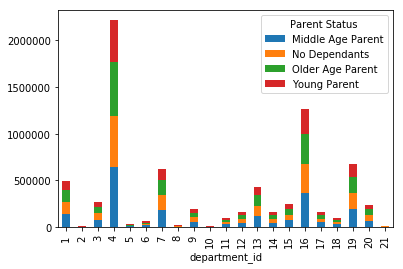

In [208]:
#Parent Status & Department Stacked Bar

parent_department_stacked_bar = crosstab_parent_department.plot.bar(stacked= True)
plt.legend(title='Parent Status')
plt.savefig('parent_department_stacked_bar.png')

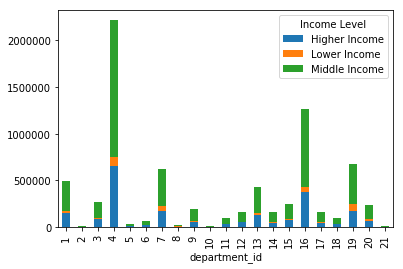

In [210]:
#Income Level & Department Stacked Bar

income_department_stacked_bar = crosstab_income_department.plot.bar(stacked= True)
plt.legend(title='Income Level')
plt.savefig('income_department_stacked_bar.png')

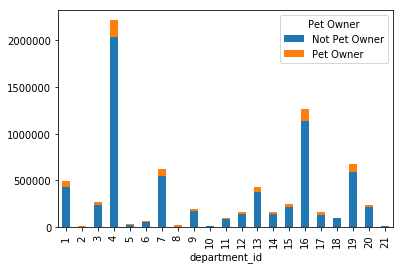

In [213]:
#Pet Owner & Department Stacked Bar

pet_department_stacked_bar = crosstab_pet_department.plot.bar(stacked= True)
plt.legend(title='Pet Owner')
plt.savefig('pet_department_stacked_bar.png')

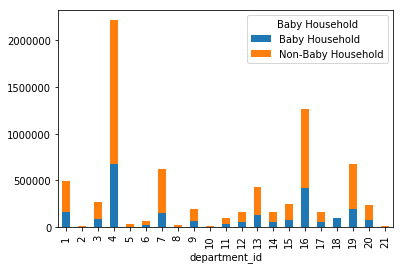

In [214]:
#Baby Household & Department Stacked Bar

baby_department_stacked_bar = crosstab_baby_department.plot.bar(stacked= True)
plt.legend(title='Baby Household')
plt.savefig('baby_department_stacked_bar.png')